In [1]:
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
data = loadtxt("Data.txt", float)
# 2. View the data as a table
data_as_frame = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data_as_frame.head()

,Months,SunSpots
0,0.0,58.0
1,1.0,62.6
2,2.0,70.0
3,3.0,55.7
4,4.0,85.0


In [2]:
def movingAverage(value,window_size):
    window=np.ones(int(window_size))/float(window_size)
    return np.convolve(value,window,'same')
def explain_anomalies(data,window_size,sigma=1.0):
    avg=movingAverage(data,window_size)
    residual=data-avg
    std=np.std(residual)
    return {'standard_devation':round(std,3),'anomalies_dict':collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(range(data.shape[0]), data, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}
def explain_anomalies_rolling_std(data,window_size,sigma=0.1):
    avg=movingAverage(data,window_size)
    avg_list=avg.tolist()
    residual=data-avg
    std=np.std(residual)
    testing_std = residual.rolling(window_size).std()
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in zip(range(data.shape[0]),
                                                                                           data, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}

In [3]:
def plot_anomalie(x,y,window_size,sigma_value=1,text_xlabel="X Axis",text_ylabel='Y Axis',applying_rolling=False):
    plt.figure(figsize=(15,8))
    plt.plot(x,y,'k.')
    y_av=movingAverage(y,window_size)
    plt.plot(x,y_av,'blue')
    plt.xlim(0,100)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    event={}
    if(applying_rolling):
        event=explain_anomalies_rolling_std(y,window_size)
    else:
        event=explain_anomalies(y,window_size)
    x_an=np.fromiter(event['anomalies_dict'].keys(),dtype=int,count=len(event['anomalies_dict']))
    y_an=np.fromiter(event['anomalies_dict'].values(),dtype=float,count=len(event['anomalies_dict']))
    plt.plot(x_an,y_an,'r^',markersize=12)
    plt.grid(True)
    plt.show()
    
    

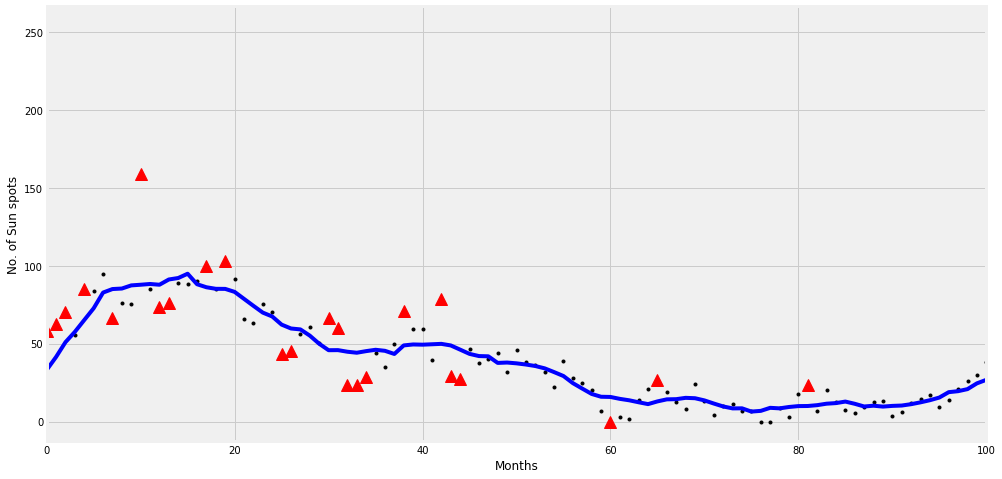

Information about the anomalies model:{'standard_devation': 11.424, 'anomalies_dict': OrderedDict([(10, 158.6), (253, 142.5), (255, 51.0), (262, 132.2), (264, 36.0), (268, 152.7), (278, 31.1), (349, 109.3), (352, 238.9), (361, 165.7), (818, 96.2), (986, 93.4), (1055, 206.3), (1069, 84.8), (1172, 107.1), (1182, 52.2), (1185, 180.4), (1464, 88.3), (1735, 129.2), (1882, 107.2), (1890, 103.6), (1897, 108.2), (2023, 154.5), (2025, 72.2), (2027, 129.3), (2171, 108.0), (2274, 165.3), (2380, 201.3), (2390, 94.8), (2391, 189.7), (2503, 158.0), (2518, 152.3), (2520, 217.4), (2521, 143.1), (2527, 199.6), (2755, 58.1), (2756, 138.2), (2789, 90.9), (2807, 127.0), (2885, 196.2), (2886, 126.9), (2897, 105.4), (2899, 200.3), (3005, 137.7), (3018, 170.1), (3032, 150.7)])}


In [4]:
x = data_as_frame['Months']
Y = data_as_frame['SunSpots']
plot_anomalie(x, y=Y, window_size=10, text_xlabel="Months", sigma_value=3,
             text_ylabel="No. of Sun spots")
events = explain_anomalies(Y, window_size=5, sigma=3)
print("Information about the anomalies model:{}".format(events))

C:\Users\aiman\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


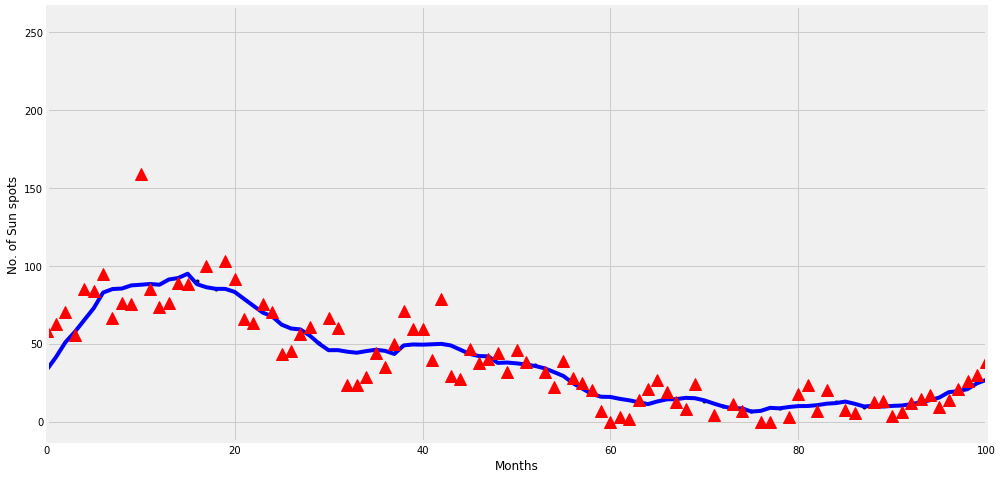

Information about the anomalies model:{'standard_devation': 11.424, 'anomalies_dict': OrderedDict([(10, 158.6), (253, 142.5), (255, 51.0), (262, 132.2), (264, 36.0), (268, 152.7), (278, 31.1), (349, 109.3), (352, 238.9), (361, 165.7), (818, 96.2), (986, 93.4), (1055, 206.3), (1069, 84.8), (1172, 107.1), (1182, 52.2), (1185, 180.4), (1464, 88.3), (1735, 129.2), (1882, 107.2), (1890, 103.6), (1897, 108.2), (2023, 154.5), (2025, 72.2), (2027, 129.3), (2171, 108.0), (2274, 165.3), (2380, 201.3), (2390, 94.8), (2391, 189.7), (2503, 158.0), (2518, 152.3), (2520, 217.4), (2521, 143.1), (2527, 199.6), (2755, 58.1), (2756, 138.2), (2789, 90.9), (2807, 127.0), (2885, 196.2), (2886, 126.9), (2897, 105.4), (2899, 200.3), (3005, 137.7), (3018, 170.1), (3032, 150.7)])}


In [5]:
x = data_as_frame['Months']
Y = data_as_frame['SunSpots']
plot_anomalie(x, y=Y, window_size=10, text_xlabel="Months", sigma_value=3,
             text_ylabel="No. of Sun spots",applying_rolling=True)
events = explain_anomalies(Y, window_size=5, sigma=3)
print("Information about the anomalies model:{}".format(events))